In [130]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
datax = np.array([[2,1],[1,1/2],[3/2,3/4],[1,2],[1/2,1],[3/4,3/2]])
datay = np.array([0,0,0,1,1,1])

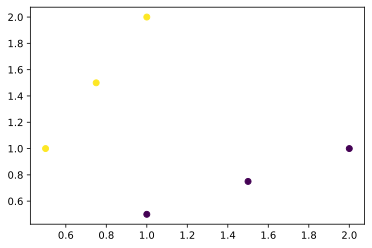

In [134]:
plt.scatter(datax[:,0], datax[:,1], c=datay)

In [44]:
def sig(z):
    return 1/(1+np.exp(-z))

In [45]:
def yhat(x,W):
    return sig( np.dot(np.append([1],x),W) )

In [46]:
def Loss(W, datax, datay):
    res = 0
    for i in range(len(datax)):
        res -= datay[i]*np.log(yhat(datax[i],W))+(1-datay[i])*np.log(1-yhat(datax[i],W))
    return res

In [129]:
# evaluate the loss function at the 3 values asked for
print(Loss(np.array([-1.5,1,-1]),datax,datay))
print(Loss(np.array([0,1,-1]),datax,datay))
print(Loss(np.array([-1.5,1,1]),datax,datay))

8.2302339820655
6.848419355626459
4.812862929315195


In [59]:
def dLoss(W,datax,datay):
    res = np.zeros(len(W))
    for i in range(len(datax)):
        res += np.append([1],datax[i])*(yhat(datax[i],W)-datay[i])
    return res

In [60]:
# print the gradient of the loss function to check it works
dLoss(np.array([-1.5,1,1]),datax,datay)

array([0.99350635, 2.4808755 , 0.2308755 ])

In [126]:
# implement gradient descent
Wmin = np.array([0.,1.,1.])
lr = 3.
for iter in range(50):
    dW = dLoss(Wmin,datax,datay)
    Wmin -= lr*dW

In [127]:
# show final value for W obtained
Wmin

array([ -0.89218347, -14.57589064,  14.62925523])

In [128]:
# see what value of the Loss we achieved
Loss(Wmin,datax,datay)

0.001917480649414253

In [199]:
# plot the predicted values for a grid of points
xpoints = np.arange(0,2.5,0.03)
ypoints = xpoints

xyinput = np.array([[i,j] for i in xpoints for j in ypoints])
# NB - in order to match up the colours I needed to compute 1-yhat for the score #
scores = [1-yhat(x,Wmin) for x in xyinput]
# choose the position of the largest value with argmax
predicition = [np.argmax(xx) for xx in np.transpose(np.array([scores,np.ones(len(scores))-scores]))]

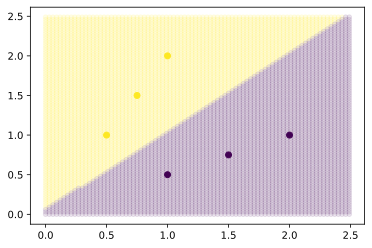

In [200]:
plt.scatter(datax[:,0], datax[:,1], c=datay)
plt.scatter(xyinput[:,0], xyinput[:,1], c=predicition, alpha=0.1, s=20)